# Предварительная подготовка данных

In [1]:
# Подключение библиотек
import pandas as pd
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

## Масштабирование количественных признаков

Разнообразный инструментарий для разработки моделей машинного обучения, а также множество дополнительных функций, включая и методы предварительной подготовки данных, реализованы в библиотеке **Scikit-learn** (**sklearn**).

Это очень обширная библиотека, включающая множество модулей. Более подробное знакомство с ней будет происходить на следующих занятиях.

[Общее описание Scikit-learn](https://scikit-learn.org/stable/index.html)


В силу большого объема  этой библиотеки ее обычно не импортируют целиком; импортируют только те инструменты, которые необходимы для работы (классы, методы, ...).

На данном этапе рассмотрим только модуль **preprocessing** этой библиотеки.

Модуль **preprocessing** включает инструментарий предварительной обработки данных (методы масштабирования количественных признаков, кодирования категориальных признаков и др.).

[Документация модуля](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, normalize

### Стандартизация

Стандартизация значений $j$-го признака означает преобразование этих значений по формуле
$$ \hat x_i^j = \frac {x_i^j - m_j}{σ_j} , \quad \quad \quad \quad (*)$$
где $ \; x_i^j \; \;- \quad $ значения $j$-го признака до масшабирования, $ \; i = 1, 2, ..., l$;

$ \quad \; \; \hat x_i^j \; \; - \quad $ значения $j$-го признака после масшабирования, $ \; i = 1, 2, ..., l$;

$ \quad \; \; m_j = \frac 1{l} \sum_{i=1}^{l} {x_i^j} \; \; - \quad $ среднее значение $j$-го признака;

$ \quad \; \; \sigma_j = \sqrt {\frac 1{l} \sum_{i=1}^{l} {(x_i^j - m_j)^2} }   \; \; - \quad $ с. к. о. $j$-го признака.

После применения формулы (*) ко всем количественным признакам среднее значение этих признаков будет равно 1, а с.к.о. равно 0 (т. е. все признаки будут иметь одинаковый масштаб). При этом не гарантируется получение каких-то конкретных минимальных и максимальных значений признаков.

Применение стандартизации включает выполнение двух действий.
1.   Вычисление по выборке статистик $m_j$ и $σ_j$ для всех признаков, подлежащих масштабированию.
2.   Применение формулы (*) ко всем признакам, подлежащим масштабированию.

Стандартизация реализована в классе **StandardScaler** модуля **preprocessing** библиотеки **Scikit-learn**.

Действие 1 выполняется с помощью метода **fit()** этого класса (вычисленные статистики сохраняются во внутренних переменных класса); действие 2 выполняется с помощью метода **transform()**.

Применение метода **fit_transform()** позволяет выполнить оба действия сразу.

*Замечание*: значения статистик, полученные в результате применения **fit()** (например, на обучающих данных), могут впоследствии применяться к другим данным (например, тестовым). Это позволит впоследствии проверить на тестовых данных правильность выбранной стратегии масштабирования, а также применять выбранную стратегию к новым данным, не участвовавшим в построении и тестировании моделей. Этим объясняется наличие двух разных методов **fit()** и **transform()**, а не только **fit_transform()**.

[Документация класса StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Проиллюстрируем применение масштабирования на примере таблицы, содержащей значения трех количественных признаков X1, X2 и X3.

In [3]:
# Создание таблицы

X1 = range(1, 12)
X2 = range(1, 52, 5)
X3 = range(1, 502, 50)
df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3})
df

,X1,X2,X3
0,1,1,1
1,2,6,51
2,3,11,101
3,4,16,151
4,5,21,201
5,6,26,251
6,7,31,301
7,8,36,351
8,9,41,401
9,10,46,451


In [4]:
# Описательные статистики по столбцам (до масштабирования)
df.describe()

,X1,X2,X3
count,11.000000,11.000000,11.00000
mean,6.000000,26.000000,251.00000
std,3.316625,16.583124,165.83124
min,1.000000,1.000000,1.00000
25%,3.500000,13.500000,126.00000
50%,6.000000,26.000000,251.00000
75%,8.500000,38.500000,376.00000
max,11.000000,51.000000,501.00000


Выполним стандартизацию столбца X1

In [5]:
# Создание копии таблицы (стандартизация будет выполняться в копии)
df_st_1 = df.copy()

In [6]:
scaler1 = StandardScaler()       # Создание обработчика (экземпляра класса StandardScaler с параметрами по умолчанию)
scaler1.fit(df_st_1[['X1']])     # Обучение обработчика (расчет статистик по данным столбца X1)

df_st_1['X1'] = scaler1.transform(df_st_1[['X1']])   # Применение обученного обработчика к столбцу 'X1'

In [7]:
df_st_1

,X1,X2,X3
0,-1.581139,1,1
1,-1.264911,6,51
2,-0.948683,11,101
3,-0.632456,16,151
4,-0.316228,21,201
5,0.000000,26,251
6,0.316228,31,301
7,0.632456,36,351
8,0.948683,41,401
9,1.264911,46,451


In [8]:
# Описательные статистики по столбцам (после масштабирования)
df_st_1.describe()

,X1,X2,X3
count,1.100000e+01,11.000000,11.00000
mean,1.009294e-16,26.000000,251.00000
std,1.048809e+00,16.583124,165.83124
min,-1.581139e+00,1.000000,1.00000
25%,-7.905694e-01,13.500000,126.00000
50%,0.000000e+00,26.000000,251.00000
75%,7.905694e-01,38.500000,376.00000
max,1.581139e+00,51.000000,501.00000


Среднее значение признака X1 после масштабирования стало практически равно 0, а с. к. о. близко к 1.

Все значения признака X1 заключены в пределах от -1.59 до 1.59.

***Замечание***. В классе StandardScaler реализовано вычисление с. к. о., эквивалентное numpy.std() при ddof=0 (см. документацию класса). В то же время в Pandas по умолчанию установлено ddof=1. Это отличие практически не влияет на результат в больших наборах данных, но оказывается заметным на маленькой выборке.

При ddof=0 получим с. к. о. (выборочное, а не исправленное), равное 1.

In [9]:
# С. к. о. по столбцам (выборочное, а не исправленное) после масштабирования
df_st_1.std(ddof=0)

,0
X1,1.000000
X2,15.811388
X3,158.113883


Выполним стандартизацию всех признаков

In [10]:
# Создание копии таблицы (стандартизация будет выполняться в копии)
df_st = df.copy()

In [11]:
scaler2 = StandardScaler()    # Создание обработчика (экземпляра класса StandardScaler с параметрами по умолчанию)
scaler2.fit(df_st)            # Обучение обработчика (расчет статистик по данным исходной таблицы)

df_st = scaler2.transform(df_st)   # Применение обученного обработчика к исходной таблице

In [12]:
df_st

array([[-1.58113883, -1.58113883, -1.58113883],
       [-1.26491106, -1.26491106, -1.26491106],
       [-0.9486833 , -0.9486833 , -0.9486833 ],
       [-0.63245553, -0.63245553, -0.63245553],
       [-0.31622777, -0.31622777, -0.31622777],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.31622777,  0.31622777,  0.31622777],
       [ 0.63245553,  0.63245553,  0.63245553],
       [ 0.9486833 ,  0.9486833 ,  0.9486833 ],
       [ 1.26491106,  1.26491106,  1.26491106],
       [ 1.58113883,  1.58113883,  1.58113883]])

В случае нескольких признаков результат возвращается в виде массива. Преобразуем его в DataFrame.

In [13]:
df_st = pd.DataFrame(df_st, columns=['X1', 'X2', 'X3'])
df_st

,X1,X2,X3
0,-1.581139,-1.581139,-1.581139
1,-1.264911,-1.264911,-1.264911
2,-0.948683,-0.948683,-0.948683
3,-0.632456,-0.632456,-0.632456
4,-0.316228,-0.316228,-0.316228
5,0.000000,0.000000,0.000000
6,0.316228,0.316228,0.316228
7,0.632456,0.632456,0.632456
8,0.948683,0.948683,0.948683
9,1.264911,1.264911,1.264911


In [14]:
# Описательные статистики по столбцам (после масштабирования)
df_st.describe()

,X1,X2,X3
count,1.100000e+01,1.100000e+01,1.100000e+01
mean,1.009294e-16,4.037175e-17,8.074349e-17
std,1.048809e+00,1.048809e+00,1.048809e+00
min,-1.581139e+00,-1.581139e+00,-1.581139e+00
25%,-7.905694e-01,-7.905694e-01,-7.905694e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.905694e-01,7.905694e-01,7.905694e-01
max,1.581139e+00,1.581139e+00,1.581139e+00


Значения всех признаков приведены к одному масштабу: диапазон значений от -1.59 до 1.59, среднее, равное 0 и с.к.о., близкое к 1 (для большой выборки было бы равно 1).

Применение метода **fit_transform()** к исходной таблице даст такой же результат.

In [15]:
df_st_ft = df.copy()
scaler3 = StandardScaler()
df_st_ft = pd.DataFrame(scaler3.fit_transform(df_st_ft), columns=['X1', 'X2', 'X3'])
df_st_ft

,X1,X2,X3
0,-1.581139,-1.581139,-1.581139
1,-1.264911,-1.264911,-1.264911
2,-0.948683,-0.948683,-0.948683
3,-0.632456,-0.632456,-0.632456
4,-0.316228,-0.316228,-0.316228
5,0.000000,0.000000,0.000000
6,0.316228,0.316228,0.316228
7,0.632456,0.632456,0.632456
8,0.948683,0.948683,0.948683
9,1.264911,1.264911,1.264911


Для уменьшения влияния выбросов на результаты стандартизации в формуле (*) вместо среднего значения и с. к. о. могут использоваться, соответственно, медиана и интерквартильный размах.

Такой способ масштабирования реализован в классе **RobustScaler** (модуль **preprocessing** библиотеки **Scikit-learn**).

[Документация класса RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

Выполним стандартизацию всех признаков исходной таблицы с помощью **RobustScaler**

In [16]:
# Создание копии таблицы (стандартизация будет выполняться в копии)
df_rob = df.copy()

In [17]:
scaler4 = RobustScaler()   # Создание обработчика (экземпляра класса RobustScaler с параметрами по умолчанию)
scaler4.fit(df_rob)        # Обучение обработчика (расчет статистик по данным исходной таблицы)

df_rob = scaler4.transform(df_rob)
df_rob = pd.DataFrame(df_rob, columns=['X1', 'X2', 'X3'])

In [18]:
df_rob

,X1,X2,X3
0,-1.0,-1.0,-1.0
1,-0.8,-0.8,-0.8
2,-0.6,-0.6,-0.6
3,-0.4,-0.4,-0.4
4,-0.2,-0.2,-0.2
5,0.0,0.0,0.0
6,0.2,0.2,0.2
7,0.4,0.4,0.4
8,0.6,0.6,0.6
9,0.8,0.8,0.8


In [19]:
# Описательные статистики по столбцам (после масштабирования)
df_rob.describe()

,X1,X2,X3
count,1.100000e+01,1.100000e+01,1.100000e+01
mean,2.018587e-17,2.018587e-17,2.018587e-17
std,6.633250e-01,6.633250e-01,6.633250e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-5.000000e-01,-5.000000e-01,-5.000000e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e-01,5.000000e-01,5.000000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


Значения всех признаков приведены к одному масштабу.

**Упражнение**. Самостоятельно сопоставить результаты применения методов стандартизации, реализованных в классах StandardScaler и RobustScaler. Сделать выводы.

### Масштабирование на отрезок
Чаще всего применяется масштабирование на отрезок [0, 1].

Масштабирование значений $j$-го признака на отрезок [0, 1] означает преобразование этих значений по формуле
$$ \hat x_i^j = \frac {x_i^j - m_j}{M_j - m_j} , \quad \quad \quad \quad (**)$$
где $ \; x_i^j \; \;- \quad $ значения $j$-го признака до масшабирования, $ \; i = 1, 2, ..., l$;

$ \quad \; \; \hat x_i^j \; \; - \quad $ значения $j$-го признака после масшабирования, $ \; i = 1, 2, ..., l$;

$ \quad \; \; m_j = \min {\{x_1^j, x_2^j, ... , x_l^j\}} \; \; - \quad $ минимальное значение $j$-го признака;

$ \quad \; \; M_j = \max {\{x_1^j, x_2^j, ... , x_l^j\}} \; \; - \quad $ максимальное значение $j$-го признака.

После применения формулы (**) минимальное значение каждого признака будет равно 0, а максимальное значение равно 1.

Применение масштабирования на отрезок [0, 1] включает выполнение двух действий.
1.   Вычисление по выборке статистик $m_j$ и $M_j$ для всех признаков, подлежащих масштабированию.
2.   Применение формулы (**) ко всем признакам, подлежащим масштабированию.

Масштабирование на отрезок реализовано в классе **MinMaxScaler** модуля **preprocessing** библиотеки **Scikit-learn**. По умолчанию выполняется масштабирование на отрезок [0, 1], но может быть задан и другой отрезок.

Действие 1 выполняется с помощью метода **fit()** этого класса (вычисленные статистики сохраняются во внутренних переменных класса); действие 2 выполняется с помощью метода **transform()**.

Применение метода **fit_transform()** позволяет выполнить оба действия сразу.

[Документация класса MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Проиллюстрируем применение масштабирования на отрезок на примере рассмотренной выше таблицы.

In [20]:
# Создание копии таблицы (масштабирование будет выполняться в копии)
df_mM = df.copy()

In [21]:
scaler5 = MinMaxScaler()    # Создание обработчика (экземпляра класса MinMaxScaler с параметрами по умолчанию)
scaler5.fit(df_mM)          # Обучение обработчика (расчет статистик по данным исходной таблицы)

df_mM = scaler5.transform(df_mM)   # Применение обученного обработчика к исходной таблице

In [22]:
df_mM = pd.DataFrame(df_mM, columns=['X1', 'X2', 'X3'])
df_mM

,X1,X2,X3
0,0.0,0.0,0.0
1,0.1,0.1,0.1
2,0.2,0.2,0.2
3,0.3,0.3,0.3
4,0.4,0.4,0.4
5,0.5,0.5,0.5
6,0.6,0.6,0.6
7,0.7,0.7,0.7
8,0.8,0.8,0.8
9,0.9,0.9,0.9


In [23]:
# Описательные статистики по столбцам (после масштабирования)
df_mM.describe()

,X1,X2,X3
count,11.000000,11.000000,11.000000
mean,0.500000,0.500000,0.500000
std,0.331662,0.331662,0.331662
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000


Для всех признаков минимальное значение равно 0, а максимальное равно 1.

### Нормализация вектора признаков

Вектор значений признаков каждого объекта выборки (строки таблицы, характеризующей объект) умножается на числовой множитель, обратный длине этого вектора:
$$ \hat {\bar x}_i = \frac 1{|\bar x_i|} \cdot \bar x_i , \quad \quad \quad \quad (***)$$
где $ \; \bar x_i = (x_i^1, x_i^2, ... , x_i^d) \; \;- \quad $ вектор признаков $i$-го объекта до масшабирования, $ \; i = 1, 2, ..., l$;

$ \quad \; \; \hat {\bar x}_i \; \; - \quad $ вектор признаков $i$-го признака после масшабирования, $ \; i = 1, 2, ..., l$;

$ \quad \; \; |\bar x_i| = \sqrt {(x_i^1)^2 + (x_i^2)^2 + ... + (x_i^d)^2} \; $.

В результате применения формулы (***) все точки, представляющие объекты выборки в многомерном признаковом пространстве, проецируются на сферу радиуса 1.

Нормализация реализована в классе **Normalizer** модуля **preprocessing** библиотеки **Scikit-learn** (по умолчанию используется эвклидова длина вектора, как показано выше, но возможны и другие варианты).

Данный метод масштабирования не требует вычисления статистик по выборке, поэтому метод **fit()** этого класса только проверяет корректность заданных параметров; преобразование значений признаков выполняется с помощью методов **transform()** или **fit_transform()**.

[Документация класса Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

Аналогичный результат можно получить с помощью функции **normalize()** модуля **preprocessing** библиотеки **Scikit-learn**.

[Документация функции normalize()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize)

Проиллюстрируем применение нормализации на примере модельной таблицы.

Для возможности получения наглядной геометрической иллюстрации создадим таблицу с двумя признаками X1 и X2, принимающими как положительные, так и отрицательные значения.

In [24]:
# Создание таблицы

np.random.RandomState(29)
X1 = sts.uniform(loc=-1, scale=2).rvs(200)       # Генерация 200 псевдослучайных чисел, равномерно распределенных на [-1, 1]
X2 = sts.uniform(loc=-10, scale=30).rvs(200)     # Генерация 200 псевдослучайных чисел, равномерно распределенных на [-10, 20]
df_new = pd.DataFrame({"X1": X1, "X2": X2})
df_new

,X1,X2
0,0.547577,1.870272
1,0.764802,4.535286
2,-0.858881,0.108888
3,0.604661,-3.759342
4,0.115393,18.621211
...,...,...
195,-0.755404,-7.624554
196,-0.636077,14.467229
197,-0.068609,-8.649807
198,0.152870,-7.448561


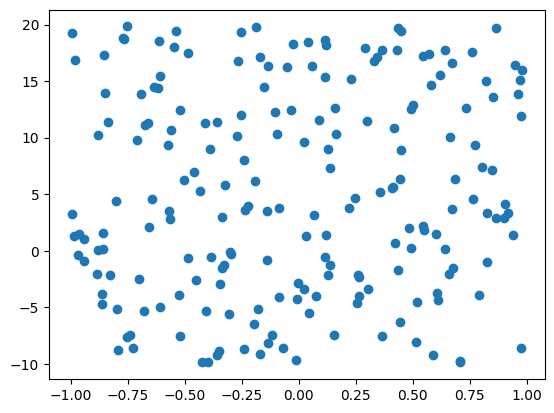

In [25]:
# Визуализация исходного набора данных
plt.scatter(df_new['X1'], df_new['X2'])

In [26]:
# Описательные статистики
df_new.describe()

,X1,X2
count,200.000000,200.000000
mean,-0.020968,5.142333
std,0.567816,8.995558
min,-0.997206,-9.887159
25%,-0.506501,-2.232272
50%,-0.029599,3.893672
75%,0.447782,13.068929
max,0.981281,19.835976


In [27]:
scaler6 = Normalizer()                       # Создание обработчика (экземпляра класса Normalizer с параметрами по умолчанию)
df_normed = scaler6.fit_transform(df_new)    # Преобразование значений
df_normed[:10]

array([[ 0.28098395,  0.95971247],
       [ 0.16628593,  0.98607758],
       [-0.99205916,  0.12577207],
       [ 0.15880129, -0.98731056],
       [ 0.00619673,  0.9999808 ],
       [ 0.02376421,  0.99971759],
       [ 0.05812379,  0.99830938],
       [ 0.03891454,  0.99924254],
       [ 0.03167643,  0.99949818],
       [-0.04318936, -0.9990669 ]])

In [28]:
# Сохранение столбцов нормализованного набора данных в отдельные массивы
x_normed = df_normed[:, 0]
y_normed = df_normed[:, 1]

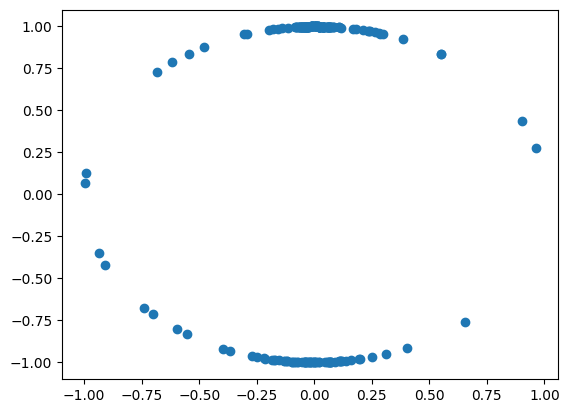

In [29]:
# Визуализация нормализованных данных
plt.scatter(x_normed, y_normed)

## Кодирование категориальных признаков

Значения категориальных признаков могут быть измерены

*   в порядковой шкале, если на множестве их значений задано отношение порядка (пример - воинские звания);
*   в номинальной шкале, если множество значений неупорядочено (примеры: названия регионов, цвета, названия тарифных планов и т. д.).

Для построения и последующего использования моделей необходимо выполнять арифметические действия со значениями признаков. Следовательно, значения всех признаков должны быть преобразованы в числовую форму.


In [30]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

### LabelEncoder

В классе **LabelEncoder** модуля **preprocessing** библиотеки **Scikit-learn** реализовано преобразование $n$ категориальных значений в целые числа от 0 до $n-1$.

[Документация класса LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Обучение обработчика и преобразование значений выполняется так же, как при масштабировании данных: путем применения методов **fit()**, **transform()** и **fit_transform()**.

Проиллюстрируем работу этого типа кодирования на примере модельной таблицы, содержащей количественные и категориальные данные.

In [31]:
# Создание таблицы

X1 = [34, 57, 23, 38, 54, 48, 41]
X2 = ['жен', 'муж', 'жен', 'муж', 'жен','муж', 'муж']
X3 = ['Тюмень', 'Новосибирск', 'Тюмень', 'Тюмень', 'Екатеринбург', 'Ханты_Мансийск', 'Екатеринбург']
X4 = ['Высокий', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Средний', 'Высокий']
X5 = ['Лучший %', 'Активный возраст','Ежедневный %', 'Управляй+', 'Лучший %', 'Управляй+', 'Лучший %']
data = pd.DataFrame({"Возраст": X1, "Пол": X2, "Город": X3, "Доход": X4, "Вклад": X5})
data

,Возраст,Пол,Город,Доход,Вклад
0,34,жен,Тюмень,Высокий,Лучший %
1,57,муж,Новосибирск,Низкий,Активный возраст
2,23,жен,Тюмень,Низкий,Ежедневный %
3,38,муж,Тюмень,Средний,Управляй+
4,54,жен,Екатеринбург,Средний,Лучший %
5,48,муж,Ханты_Мансийск,Средний,Управляй+
6,41,муж,Екатеринбург,Высокий,Лучший %


In [32]:
# Создание копии таблицы (кодирование будет выполняться в копии)
data_Label = data.copy()
data_Label

,Возраст,Пол,Город,Доход,Вклад
0,34,жен,Тюмень,Высокий,Лучший %
1,57,муж,Новосибирск,Низкий,Активный возраст
2,23,жен,Тюмень,Низкий,Ежедневный %
3,38,муж,Тюмень,Средний,Управляй+
4,54,жен,Екатеринбург,Средний,Лучший %
5,48,муж,Ханты_Мансийск,Средний,Управляй+
6,41,муж,Екатеринбург,Высокий,Лучший %


Выполним кодирование трех категориальных столбцов таблицы с помощью LabelEncoder.

In [33]:
Label_encoder = LabelEncoder()   # Создание обработчика (экземпляра класса LabelEncoder с параметрами по умолчанию)

# Преобразование данных
data_Label.loc[:, 'Пол'] = Label_encoder.fit_transform(data_Label.loc[:, 'Пол'])
data_Label.loc[:, 'Город'] = Label_encoder.fit_transform(data_Label.loc[:, 'Город'])
data_Label.loc[:, 'Доход'] = Label_encoder.fit_transform(data_Label.loc[:, 'Доход'])

In [34]:
data_Label

,Возраст,Пол,Город,Доход,Вклад
0,34,0,2,0,Лучший %
1,57,1,1,1,Активный возраст
2,23,0,2,1,Ежедневный %
3,38,1,2,2,Управляй+
4,54,0,0,2,Лучший %
5,48,1,3,2,Управляй+
6,41,1,0,0,Лучший %


Видим, что обработчик просто нумерует все уникальные значения категориального признака, и в качестве нового числового значения использует номер категории в списке уникальных значений.

Если для признака "Пол" такой подход еще может быть оправдан, то для признаков "Город" и "Доход" - категорически нет.

**Главная проблема** этого метода кодирования - создание в данных несуществующих зависимостей: в процессе обучения, например, линейной модели регрессии,
> значение 3 признака "Город" (изначально - Ханты-Мансийск) будет рассматриваться, как бОльшее, чем 2, 1 и 0 (изначально - Тюмень, Новосибирск и Екатеринбург соответственно);

> значение 2 признака "Доход" (изначально - Средний) будет рассматриваться, как бОльшее, чем 1 и 0 (Низкий и Высокий соответственно).

Поэтому подход, реализованный в **LabelEncoder**, рекомендуется использовать только для кодирования значений прогнозируемого признака (названий классов объектов в задачах многоклассовой классификации). В этой ситуации порядок, в котором будут нумероваться названия классов, не важен и никак не повлияет на качество решения.

При выборе подхода к кодированию входных признаков будущей модели необходимо различать кодирование порядковых данных и кодирование данных, измеренных в номинальной шкале.

**В случае кодирования порядковых данных** можно использовать номера категорий в качестве новых (числовых) значений, но при этом **порядок на множестве номеров должен соответствовать порядку на множестве значений признака**.

Из рассмотренного примера видно, что LabelEncoder не обеспечивает выполнение этого условия: значения порядкового признака "Доход", расположенные по возрастанию, образуют последовательность
Низкий, Средний, Высокий, в то время как присвоенные им значения - последовательность 1, 2, 0.

### Кодирование порядковых данных. OrdinalEncoder

В классе **OrdinalEncoder** модуля **preprocessing** библиотеки **Scikit-learn** реализовано преобразование $n$ категориальных значений в целые числа от 0 до $n-1$. При этом имеется возможность определения порядка на множестве категорий (через параметр **categories**).

[Документация класса OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)

Обучение обработчика и преобразование значений выполняется так же, как при масштабировании: путем применения методов **fit()**, **transform()** и **fit_transform()**.

Продолжим рассмотрение примера с модельной таблицей. Как уже отмечено, среди категориальных признаков этого набора данных порядковым является признак "Доход". Выполним кодирование значений этого признака с помощью **OrdinalEncoder**, указав отношение порядка на множестве категорий.

Создадим еще одну копию исходной таблицы.

In [35]:
data_Ordinal = data.copy()
data_Ordinal

,Возраст,Пол,Город,Доход,Вклад
0,34,жен,Тюмень,Высокий,Лучший %
1,57,муж,Новосибирск,Низкий,Активный возраст
2,23,жен,Тюмень,Низкий,Ежедневный %
3,38,муж,Тюмень,Средний,Управляй+
4,54,жен,Екатеринбург,Средний,Лучший %
5,48,муж,Ханты_Мансийск,Средний,Управляй+
6,41,муж,Екатеринбург,Высокий,Лучший %


In [36]:
# Создание обработчика (экземпляра класса OrdinalEncoder с указанием порядка категорий).
# Установка параметров handle_unknown и unknown_value будет пояснена позднее
Ordinal_encoder = OrdinalEncoder(categories=[['Низкий', 'Средний', 'Высокий']], handle_unknown='use_encoded_value', unknown_value=np.nan)

# Преобразование данных
data_Ordinal.loc[:, ['Доход']] = Ordinal_encoder.fit_transform(data_Ordinal.loc[:, ['Доход']])

In [37]:
data_Ordinal

,Возраст,Пол,Город,Доход,Вклад
0,34,жен,Тюмень,2.0,Лучший %
1,57,муж,Новосибирск,0.0,Активный возраст
2,23,жен,Тюмень,0.0,Ежедневный %
3,38,муж,Тюмень,1.0,Управляй+
4,54,жен,Екатеринбург,1.0,Лучший %
5,48,муж,Ханты_Мансийск,1.0,Управляй+
6,41,муж,Екатеринбург,2.0,Лучший %


Теперь порядок на множестве числовых значений, присвоенных в результате кодирования, соответствует порядку на множестве категорий признака "Доход": 0 - Низкий, 1 - Средний, 2- Высокий.

**Вывод**: подход, реализованнй в классе  **OrdinalEncoder**, вполне приемлем для кодирования порядковых данных.

Однако применение этого подхода к данным, измеренным в номинальной шкале (признаки "Город" и "Вклад"), привело бы к появлению отношения порядка на множестве значений этих признаков, в то время как в действительности оно отсутствует. Для кодирования данных этого типа должен применяться подход, не связанный с присвоением порядковых номеров категорий.

### Кодирование данных, измеренных в номинальной шкале. OneHotEncoder

В классе **OneHotEncoder** модуля **preprocessing** библиотеки **Scikit-learn** реализовано преобразование каждого из $n$ категориальных значений признака в бинарный вектор длины $n$, содержащий 1 в позиции, соответствующей определенной категории, и 0 во всех остальных позициях.

**Процедура бинарного кодирования (One Hot Encoding, OHE).**

Пусть категориальный признак может принимать $n$ возможных значений. Перенумеруем эти значения произвольным образом: $c_1, c_2, ... , c_n$ .

Обозначим $f(x) \; - $ значение этого признака (одна из категорий $c_1, c_2, ... , c_n$) на объекте $x$.

Введем  $n$ бинарных признаков $b_1(x), b_2(x), ... , b_n(x) \; $ (по количеству категорий), значения которых на объекте $x$ определяются следующим образом:

$ \qquad b_i(x) = 1 , \quad $  если $ \quad f(x) = c_i ,$

$ \qquad b_i(x) = 0 \quad $  иначе.

Таким образом, одна категория заменяется бинарным вектором, содержащим 1 в одной позиции и 0 в остальных.

При таком походе на множестве категорий не создается отношения порядка, и порядок нумерации категорий не повлияет на процесс обучения будущей модели.

[Документация класса OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

Обучение обработчика и преобразование значений выполняется так же, как при масштабировании: путем применения методов **fit()**, **transform()** и **fit_transform()**.

Продолжим рассмотрение примера с модельной таблицей. Выполним бинарное кодирование значений признаков "Город" и "Вклад" с помощью **OneHotEncoder**.

Продолжим работу с таблицей, полученной после применения OrdinalEncoder.

In [38]:
data_ohe = data_Ordinal.copy()
data_ohe

,Возраст,Пол,Город,Доход,Вклад
0,34,жен,Тюмень,2.0,Лучший %
1,57,муж,Новосибирск,0.0,Активный возраст
2,23,жен,Тюмень,0.0,Ежедневный %
3,38,муж,Тюмень,1.0,Управляй+
4,54,жен,Екатеринбург,1.0,Лучший %
5,48,муж,Ханты_Мансийск,1.0,Управляй+
6,41,муж,Екатеринбург,2.0,Лучший %


Для лучшего понимания процесса будем выполнять кодирование признаков поочередно

In [39]:
# Создание обработчика (экземпляра класса OneHotEncoder с формированием результата в виде массива, а не sparse matrix)
# Установка параметра handle_unknown будет пояснена позднее
OHE_encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Преобразование данных
encoded1 = OHE_encoder1.fit_transform(data_ohe.loc[:, ['Город']])
encoded1

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [40]:
# Вывод названий бинарных признаков в соответствии с исходными категориями
OHE_encoder1.get_feature_names_out()

array(['Город_Екатеринбург', 'Город_Новосибирск', 'Город_Тюмень',
       'Город_Ханты_Мансийск'], dtype=object)

Преобразуем полученный бинарный массив в DataFrame с соответствующими названиями столбцов и присоединим его к таблице, сформированной ранее.

In [41]:
data_enc1 = data_ohe.join(pd.DataFrame(encoded1, columns=OHE_encoder1.get_feature_names_out()))
data_enc1

,Возраст,Пол,Город,Доход,Вклад,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск
0,34,жен,Тюмень,2.0,Лучший %,0.0,0.0,1.0,0.0
1,57,муж,Новосибирск,0.0,Активный возраст,0.0,1.0,0.0,0.0
2,23,жен,Тюмень,0.0,Ежедневный %,0.0,0.0,1.0,0.0
3,38,муж,Тюмень,1.0,Управляй+,0.0,0.0,1.0,0.0
4,54,жен,Екатеринбург,1.0,Лучший %,1.0,0.0,0.0,0.0
5,48,муж,Ханты_Мансийск,1.0,Управляй+,0.0,0.0,0.0,1.0
6,41,муж,Екатеринбург,2.0,Лучший %,1.0,0.0,0.0,0.0


Сопоставляя значения в столбце "Город" и новых бинарных столбцах, можно убедиться в правильности кодирования.

После этого исходный столбец с категориями можно удалить.

In [42]:
data_enc1 = data_enc1.drop('Город', axis = 1)
data_enc1

,Возраст,Пол,Доход,Вклад,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск
0,34,жен,2.0,Лучший %,0.0,0.0,1.0,0.0
1,57,муж,0.0,Активный возраст,0.0,1.0,0.0,0.0
2,23,жен,0.0,Ежедневный %,0.0,0.0,1.0,0.0
3,38,муж,1.0,Управляй+,0.0,0.0,1.0,0.0
4,54,жен,1.0,Лучший %,1.0,0.0,0.0,0.0
5,48,муж,1.0,Управляй+,0.0,0.0,0.0,1.0
6,41,муж,2.0,Лучший %,1.0,0.0,0.0,0.0


Аналогичные действия можно выполнить со столбцом "Вклад".

In [43]:
# Создание обработчика (экземпляра класса OneHotEncoder с формированием результата в виде массива, а не sparse matrix)
# Установка параметра handle_unknown будет пояснена позднее
OHE_encoder2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Преобразование данных
encoded2 = OHE_encoder2.fit_transform(data_ohe.loc[:, ['Вклад']])
encoded2

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [44]:
# Вывод названий бинарных признаков в соответствии с исходными категориями
OHE_encoder2.get_feature_names_out()

array(['Вклад_Активный возраст', 'Вклад_Ежедневный %', 'Вклад_Лучший %',
       'Вклад_Управляй+'], dtype=object)

Преобразуем полученный бинарный массив в DataFrame с соответствующими названиями столбцов и присоединим его к таблице, сформированной ранее.

In [45]:
data_enc2 = data_enc1.join(pd.DataFrame(encoded2, columns=OHE_encoder2.get_feature_names_out()))
data_enc2

,Возраст,Пол,Доход,Вклад,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск,Вклад_Активный возраст,Вклад_Ежедневный %,Вклад_Лучший %,Вклад_Управляй+
0,34,жен,2.0,Лучший %,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,муж,0.0,Активный возраст,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,23,жен,0.0,Ежедневный %,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,38,муж,1.0,Управляй+,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,жен,1.0,Лучший %,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,48,муж,1.0,Управляй+,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,41,муж,2.0,Лучший %,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Сопоставляя значения в столбце "Вклад" и новых бинарных столбцах, можно убедиться в правильности кодирования.

После этого исходный столбец с категориями можно удалить.

In [46]:
data_enc2 = data_enc2.drop('Вклад', axis = 1)
data_enc2

,Возраст,Пол,Доход,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск,Вклад_Активный возраст,Вклад_Ежедневный %,Вклад_Лучший %,Вклад_Управляй+
0,34,жен,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,муж,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,23,жен,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,38,муж,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,жен,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,48,муж,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,41,муж,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Признак "Пол" по сути является бинарным, поэтому для этого столбца выбор метода кодирования не столь важен. Чтобы не создавать дополнительных столбцов, можно использовать OrdinalEncoder или даже LabelEncoder.

In [47]:
Ordinal_encoder2 = OrdinalEncoder()   # Создание обработчика (экземпляра класса OrdinalEncoder с параметрами по умолчанию)

# Преобразование данных
data_enc2.loc[:, ['Пол']] = Ordinal_encoder2.fit_transform(data_enc2.loc[:, ['Пол']])

In [48]:
data_enc2

,Возраст,Пол,Доход,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск,Вклад_Активный возраст,Вклад_Ежедневный %,Вклад_Лучший %,Вклад_Управляй+
0,34,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,38,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,48,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,41,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Теперь все категориальные данные преобразованы в числовую форму, и полученный набор данных может использоваться в качестве входных данных для построения модели.

### Обработка неизвестных категорий

Процедура кодирования категориальных данных с помощью обученных обработчиков впоследствии может применяться к новым данным (не участвовавшим в настройке процесса кодирования). В новых данных могут присутствовать категории, которых не было в обучающих данных (и, следовательно, неизвестные обработчику). Имеет смысл предусмотреть возможность корректной работы процедур кодирования и в такой ситуации.

Все рассмотренные выше классы с настройками по умолчанию не могут обрабатывать неизвестные категории (при обнаружении неизвестного значения будет выдано сообщение об ошибке).

В классе **OrdinalEncoder** эта проблема решается путем установки параметра **handle_unknown='use_encoded_value'** и указания способа кодирования неизвестных значений через параметр **unknown_value** (в примере выше было задано unknown_value=np.nan - неизвестной категориии будет соспоставлено NaN).

В классе **OneHotEncoder** можно, например, установить **handle_unknown='ignore'**. В этом случае неизвестные категории будут кодироваться чисто нулевыми векторами (показывает отсутствие совпадения со всеми известными обработчику категориями).

См. документацию классов.

Проиллюстрируем обработку неизвестных значений на примере рассмотренной выше таблицы.
Добавим к исходной (незакодированной) таблице новую строку, в которой содержатся новые (не использованные при обучении обработчиков) значения в столбцах "Доход" и "Город".

In [49]:
new_row = pd.DataFrame({"Возраст": [45], "Пол": ['жен'], "Доход": ['Ниже среднего'], "Город": ['Сургут'], "Вклад": ['Управляй+']})
new_data = pd.concat([data, new_row], ignore_index=True)
new_data

,Возраст,Пол,Город,Доход,Вклад
0,34,жен,Тюмень,Высокий,Лучший %
1,57,муж,Новосибирск,Низкий,Активный возраст
2,23,жен,Тюмень,Низкий,Ежедневный %
3,38,муж,Тюмень,Средний,Управляй+
4,54,жен,Екатеринбург,Средний,Лучший %
5,48,муж,Ханты_Мансийск,Средний,Управляй+
6,41,муж,Екатеринбург,Высокий,Лучший %
7,45,жен,Сургут,Ниже среднего,Управляй+


In [50]:
# Создание копии таблицы
new_data_encoded = new_data.copy()

При создании кодировщиков для столбцов "Доход" и "Город" была предусмотрена возможность обработки неизвестных категорий - заданы значения соответствующим параметрам (см. код выше).

Поэтому можно просто применить уже обученные ранее обработчики к новой таблице - использовать метод **transform()**.

In [51]:
# Преобразование столбца "Доход" с применением обученного ранее обработчика
new_data_encoded.loc[:, ['Доход']] = Ordinal_encoder.transform(new_data_encoded.loc[:, ['Доход']])

# Преобразование столбца "Город" с помощью обученного ранее обработчика
encoded = OHE_encoder1.transform(new_data_encoded.loc[:, ['Город']])
# Присоединение новых столбцов к полученной ранее таблице
new_data_encoded = new_data_encoded.join(pd.DataFrame(encoded, columns=OHE_encoder1.get_feature_names_out()))

# Преобразование столбца "Вклад" с помощью обученного ранее обработчика
encoded = OHE_encoder2.transform(new_data_encoded.loc[:, ['Вклад']])
# Присоединение новых столбцов к полученной ранее таблице
new_data_encoded = new_data_encoded.join(pd.DataFrame(encoded, columns=OHE_encoder2.get_feature_names_out()))

# Преобразование данных в столбце "Пол" с помощью обученного ранее обработчика
new_data_encoded.loc[:, ['Пол']] = Ordinal_encoder2.transform(new_data_encoded.loc[:, ['Пол']])

In [52]:
new_data_encoded

,Возраст,Пол,Город,Доход,Вклад,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск,Вклад_Активный возраст,Вклад_Ежедневный %,Вклад_Лучший %,Вклад_Управляй+
0,34,0.0,Тюмень,2.0,Лучший %,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1.0,Новосибирск,0.0,Активный возраст,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,23,0.0,Тюмень,0.0,Ежедневный %,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,38,1.0,Тюмень,1.0,Управляй+,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,0.0,Екатеринбург,1.0,Лучший %,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,48,1.0,Ханты_Мансийск,1.0,Управляй+,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,41,1.0,Екатеринбург,2.0,Лучший %,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,45,0.0,Сургут,NaN,Управляй+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Неизвестная кодировщику категория в столбце "Доход" отображается как пропущенное (неизвестное) значение, а бинарный вектор, кодирующий неизвестный город (Сургут), содержит только 0 (нет совпадения ни с одним из городов, участвовавших в обучении).

*Замечание*. Выбор замены неизвестных категорий на NaN вовсе не является обязательным. В данном примере это сделано в иллюстративных целях. В реальных задачах способ кодирования неизвестных категорий должен быть обоснован по результатам разведочного анализа.

In [53]:
# Удаление столбцов с категориями
new_data_encoded = new_data_encoded.drop(['Город','Вклад'], axis = 1)
new_data_encoded

,Возраст,Пол,Доход,Город_Екатеринбург,Город_Новосибирск,Город_Тюмень,Город_Ханты_Мансийск,Вклад_Активный возраст,Вклад_Ежедневный %,Вклад_Лучший %,Вклад_Управляй+
0,34,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,38,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,48,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,41,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,45,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
